Epoch 1/5
1562/1562 [==============================] - 104s 66ms/step - loss: 1.9516 - accuracy: 0.3282 - val_loss: 1.6545 - val_accuracy: 0.4646
Epoch 2/5
1562/1562 [==============================] - 100s 64ms/step - loss: 1.7585 - accuracy: 0.4132 - val_loss: 1.5784 - val_accuracy: 0.4941
Epoch 3/5
1562/1562 [==============================] - 100s 64ms/step - loss: 1.7238 - accuracy: 0.4329 - val_loss: 1.5810 - val_accuracy: 0.4848
Epoch 4/5
1562/1562 [==============================] - 102s 65ms/step - loss: 1.7090 - accuracy: 0.4433 - val_loss: 1.5450 - val_accuracy: 0.5222
Epoch 5/5
313/313 [==============================] - 5s 15ms/step - loss: 1.4774 - accuracy: 0.5429
Test accuracy: 54.29%


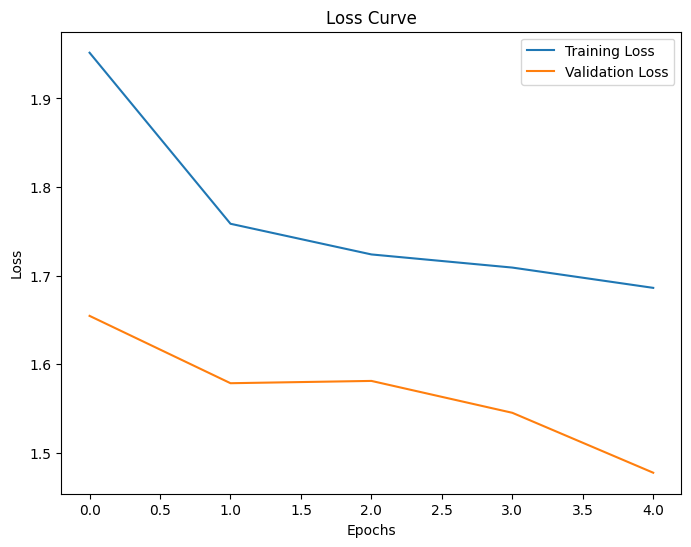

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001), input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5)

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)
datagen.fit(X_train)

history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    steps_per_epoch=len(X_train) / 32,
                    epochs=5,
                    verbose=1,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping])

test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy: {:.2f}%".format(test_acc * 100))


plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
